In [1]:
import ROOT as R
import math
import os
import numpy as np

Welcome to JupyROOT 6.26/10


In [2]:
R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.03)
R.gStyle.SetPadLeftMargin(0.12)

Calculating mean/max hit multiplicities in VTX layer

In [3]:
sens_area = {}
for sub in range(2):
    sens_area.update({('b',l*2+sub): 1e-2*130*a for l, a in enumerate([16*13,15*23,21*24,29*24])})

In [5]:
sens_area

{('b', 0): 270.40000000000003,
 ('b', 2): 448.5,
 ('b', 4): 655.2,
 ('b', 6): 904.8000000000001,
 ('b', 1): 270.40000000000003,
 ('b', 3): 448.5,
 ('b', 5): 655.2,
 ('b', 7): 904.8000000000001}

In [5]:
DIR_IN = '/Users/chris/Desktop/MC/data/'
files_in = [R.TFile(os.path.join(DIR_IN,f'mumu_t25ns_n150MeV_v1.0.1_{n}.root')) for n in [
    'tuple_simtrk', 'no_early_tuple_trk', 'no_early_tuple_trk_dl'
]]
trees = [file_in.Get('MyLCTuple') for file_in in files_in]

In [9]:
# set canvas

C = R.TCanvas('canvas','',1000,1000)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)
DIR_OUT = DIR_IN

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [7]:
nH = 3
histos = [R.TH1F(f'h{i:d}', ';Layer;Hit density [cm^{-2}]', 16, 0, 16) for i in range(nH)]
trees[0].Draw('int(stci0/128)%64 >> h0', 'stori == 1')
trees[1].Draw('int(thci0/128)%64 >> h1', 'thori == 1')
trees[2].Draw('int(thci0/128)%64 >> h2', 'thori == 1')

for iH, h in enumerate(histos):
    # Converting to hit density
    for l in range(8):
        h.SetBinContent(l+1, h.GetBinContent(l+1) / sens_area[('b', l)])

Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: jpg file /Users/chris/Desktop/origbig.jpeg has been created


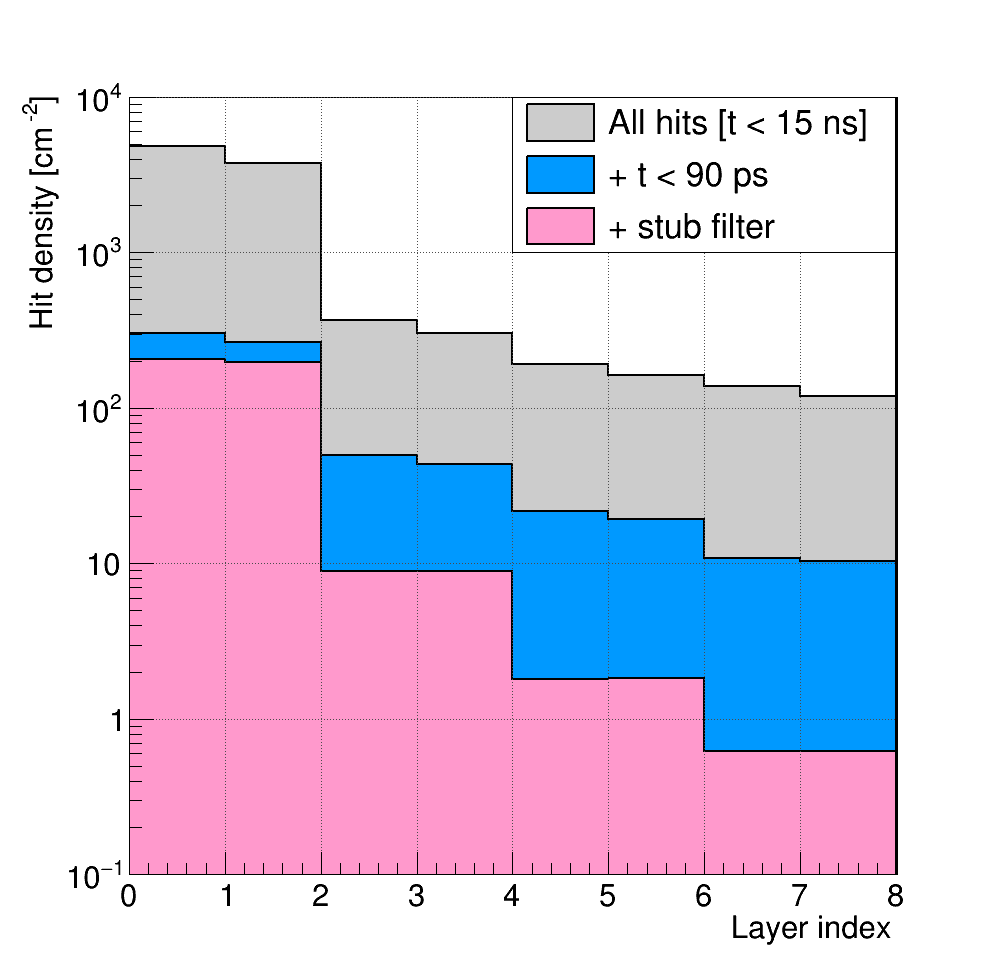

In [12]:
names = [
    'All hits [t < 15 ns]',
    '+ t < 90 ps',
    '+ stub filter'
]
R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)
C.SetLogy(True)
leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
fills = [17, R.kAzure+7, R.kPink+1]
# colors = [1, 11, 15]
# fills = [0, 12, 16]
yMax = 1e4
h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 8, 0, 8)
h_ax.GetYaxis().SetMaxDigits(3)
h_ax.SetAxisRange(1e-1, yMax, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
#a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')
# Drawing
for iT, h in enumerate(histos):
    h.SetLineColor(1)
    h.SetFillColor(fills[iT])
    h.SetLineWidth(2)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
# Drawing text labels
#t1 = R.TText(4, 3e-1, 'Barrel')

for t in [t1]:
    t.SetTextAlign(22)
    t.SetTextColor(1)
    #t.Draw()
# Drawing vertical separator
l = R.TLine(8, 0, 8, yMax)
l.SetLineWidth(3)
l.SetLineColor(1)
l.Draw()
C.SaveAs("~/Desktop/origbig.jpeg")

Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: pdf file /Users/chris/Desktop/MC/data/hit_mult_no_early.pdf has been created


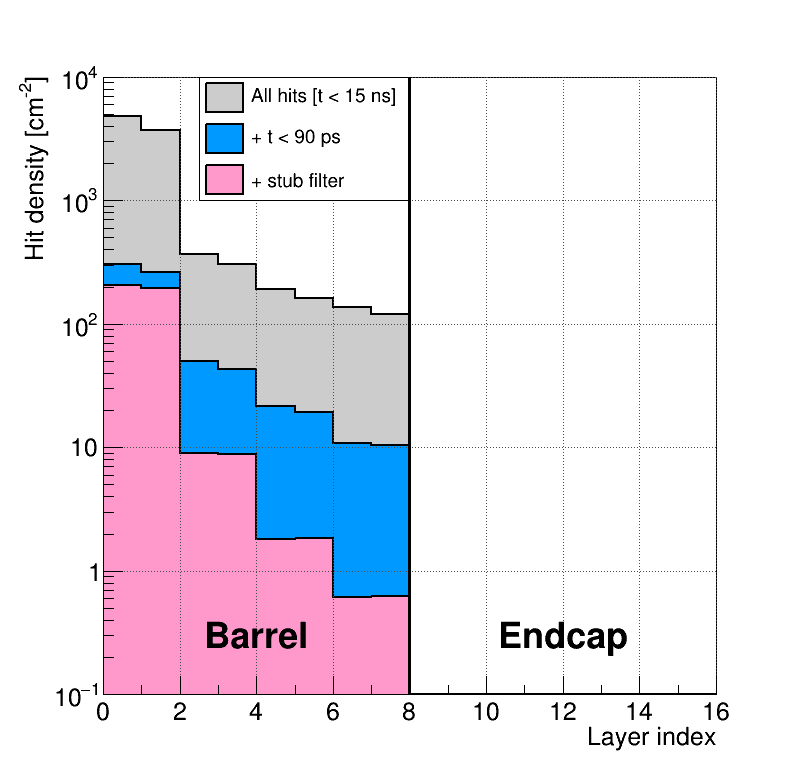

In [27]:
names = [
    'All hits [t < 15 ns]',
    '+ t < 90 ps',
    '+ stub filter'
]
R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)
C.SetLogy(True)
leg = R.TLegend(0.25, 0.74, 0.515, 0.9)
colors = [12, R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
fills = [17, R.kAzure+7, R.kPink+1]
# colors = [1, 11, 15]
# fills = [0, 12, 16]
yMax = 1e4
h_ax = R.TH1F('h_ax', ';Layer index;Hit density [cm^{-2}]', 16, 0, 16)
h_ax.GetYaxis().SetMaxDigits(3)
h_ax.SetAxisRange(1e-1, yMax, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')
# Drawing
for iT, h in enumerate(histos):
    h.SetLineColor(1)
    h.SetFillColor(fills[iT])
    h.SetLineWidth(2)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
# Drawing text labels
t1 = R.TText(4, 3e-1, 'Barrel')
t2 = R.TText(12, 3e-1, 'Endcap')
for t in [t1, t2]:
    t.SetTextAlign(22)
    t.SetTextColor(1)
    t.Draw()
# Drawing vertical separator
l = R.TLine(8, 0, 8, yMax)
l.SetLineWidth(3)
l.SetLineColor(1)
l.Draw()
C.SaveAs(os.path.join(DIR_IN, 'hit_mult_no_early.pdf'))